In [1]:
import numpy as np
import os
import pandas as pd
import torch
import albumentations as A
import albumentations.pytorch
import cv2
import sys
import random
import csv
import json
import matplotlib.pyplot as plt

sys.path.append('../')
from visualize import visualize
from utils import *

%matplotlib inline

In [12]:
df = pd.read_csv('../saved/df.csv')
df.label = df.label.apply(lambda x : CLASS_MAPPER[str(x)])
df = drop_wrong(df)
df.reset_index(drop=True, inplace=True)
print(df.shape)

(22662, 14)


In [13]:
df.label.value_counts()

ASC-US       11057
LSIL          5248
Negative      3647
HSIL          1466
ASC-H         1225
Carcinoma       19
Name: label, dtype: int64

In [14]:
df = df.sort_values('area', axis=0, ascending=False)

../../lbp_data/patch_images/2021.05.17/LBC745-20210115(1)/LBC745-20210115(1)_1294.png [1243    5  543  567] ['LSIL'] [554]
../../lbp_data/patch_images/2021.05.28/LBC1350-20210125(1)/LBC1350-20210125(1)_943.png [714 650 570 540] ['HSIL'] [554]
../../lbp_data/patch_images/2021.05.28/LBC1350-20210125(1)/LBC1350-20210125(1)_1154.png [  71 1004  472  649] ['HSIL'] [553]
../../lbp_data/patch_images/2021.05.28/LBC1350-20210125(1)/LBC1350-20210125(1)_1702.png [1089  734  581  526] ['HSIL'] [552]
../../lbp_data/patch_images/2021.05.17/LBC745-20210115(1)/LBC745-20210115(1)_222.png [1625  325  422  720] ['LSIL'] [551]
../../lbp_data/patch_images/2021.05.28/LBC1350-20210125(1)/LBC1350-20210125(1)_1109.png [122 794 632 480] ['HSIL'] [550]
../../lbp_data/patch_images/2021.05.28/LBC1350-20210125(1)/LBC1350-20210125(1)_922.png [1061  544  545  555] ['HSIL'] [549]
../../lbp_data/patch_images/2021.01.14/LBC419-20210111(1)/LBC419-20210111(1)_463.png [748 371 603 499] ['ASC-US'] [548]
../../lbp_data/patch

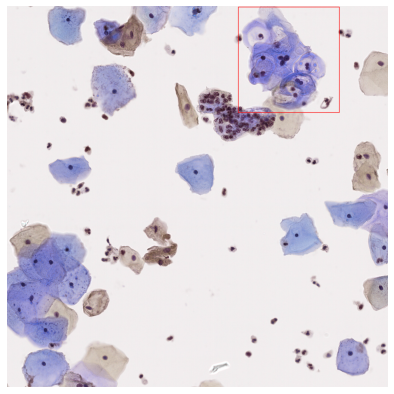

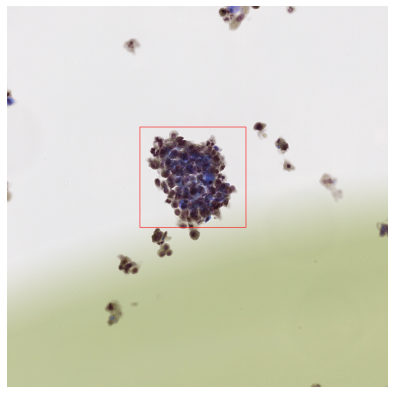

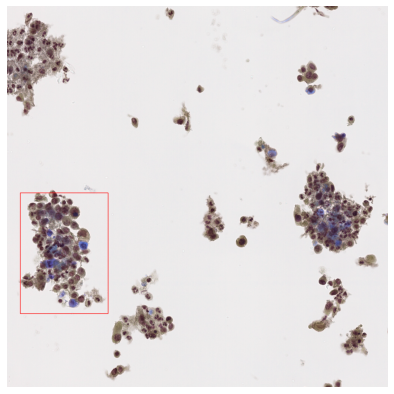

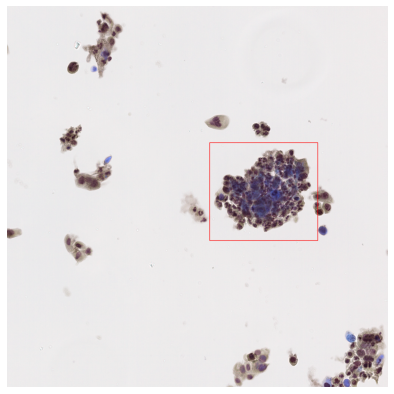

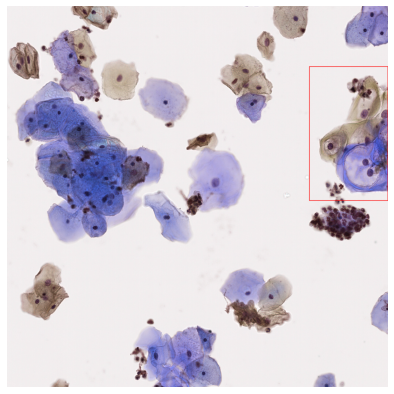

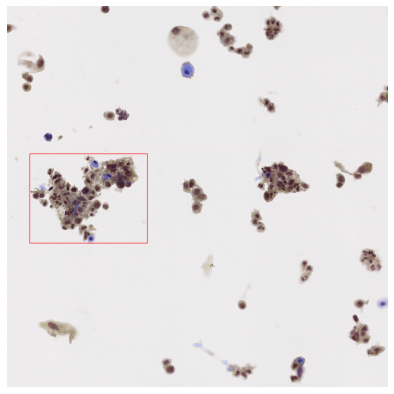

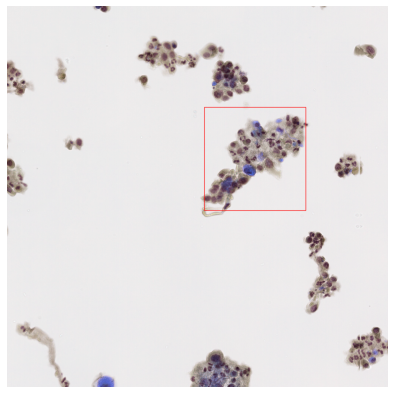

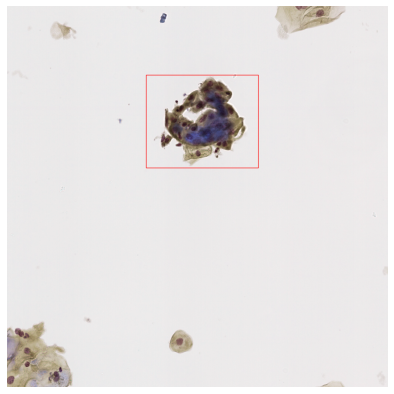

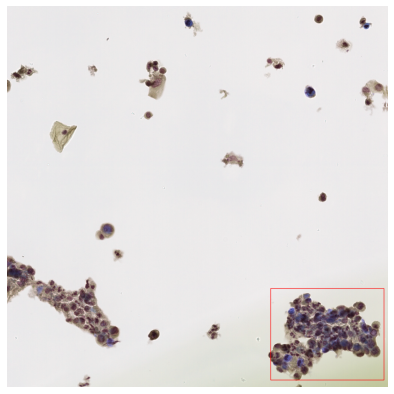

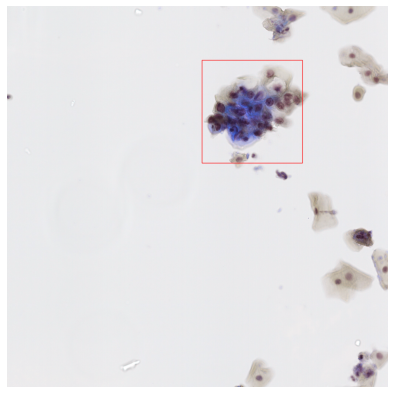

In [23]:
rel_path = '../../lbp_data/'

for NUM in range(100, 110) :
    path = rel_path + df[['file_name']].values[NUM][0]
    boxes = df[['xmin', 'ymin', 'w', 'h']].values[NUM]
    label = df[['label']].values[NUM]
    area = df[['area']].values[NUM]
    print(path, boxes, label, area)
    img = cv2.imread(path)
    visualize(img, [boxes])  